By: Lutfia Hayatun Nufus


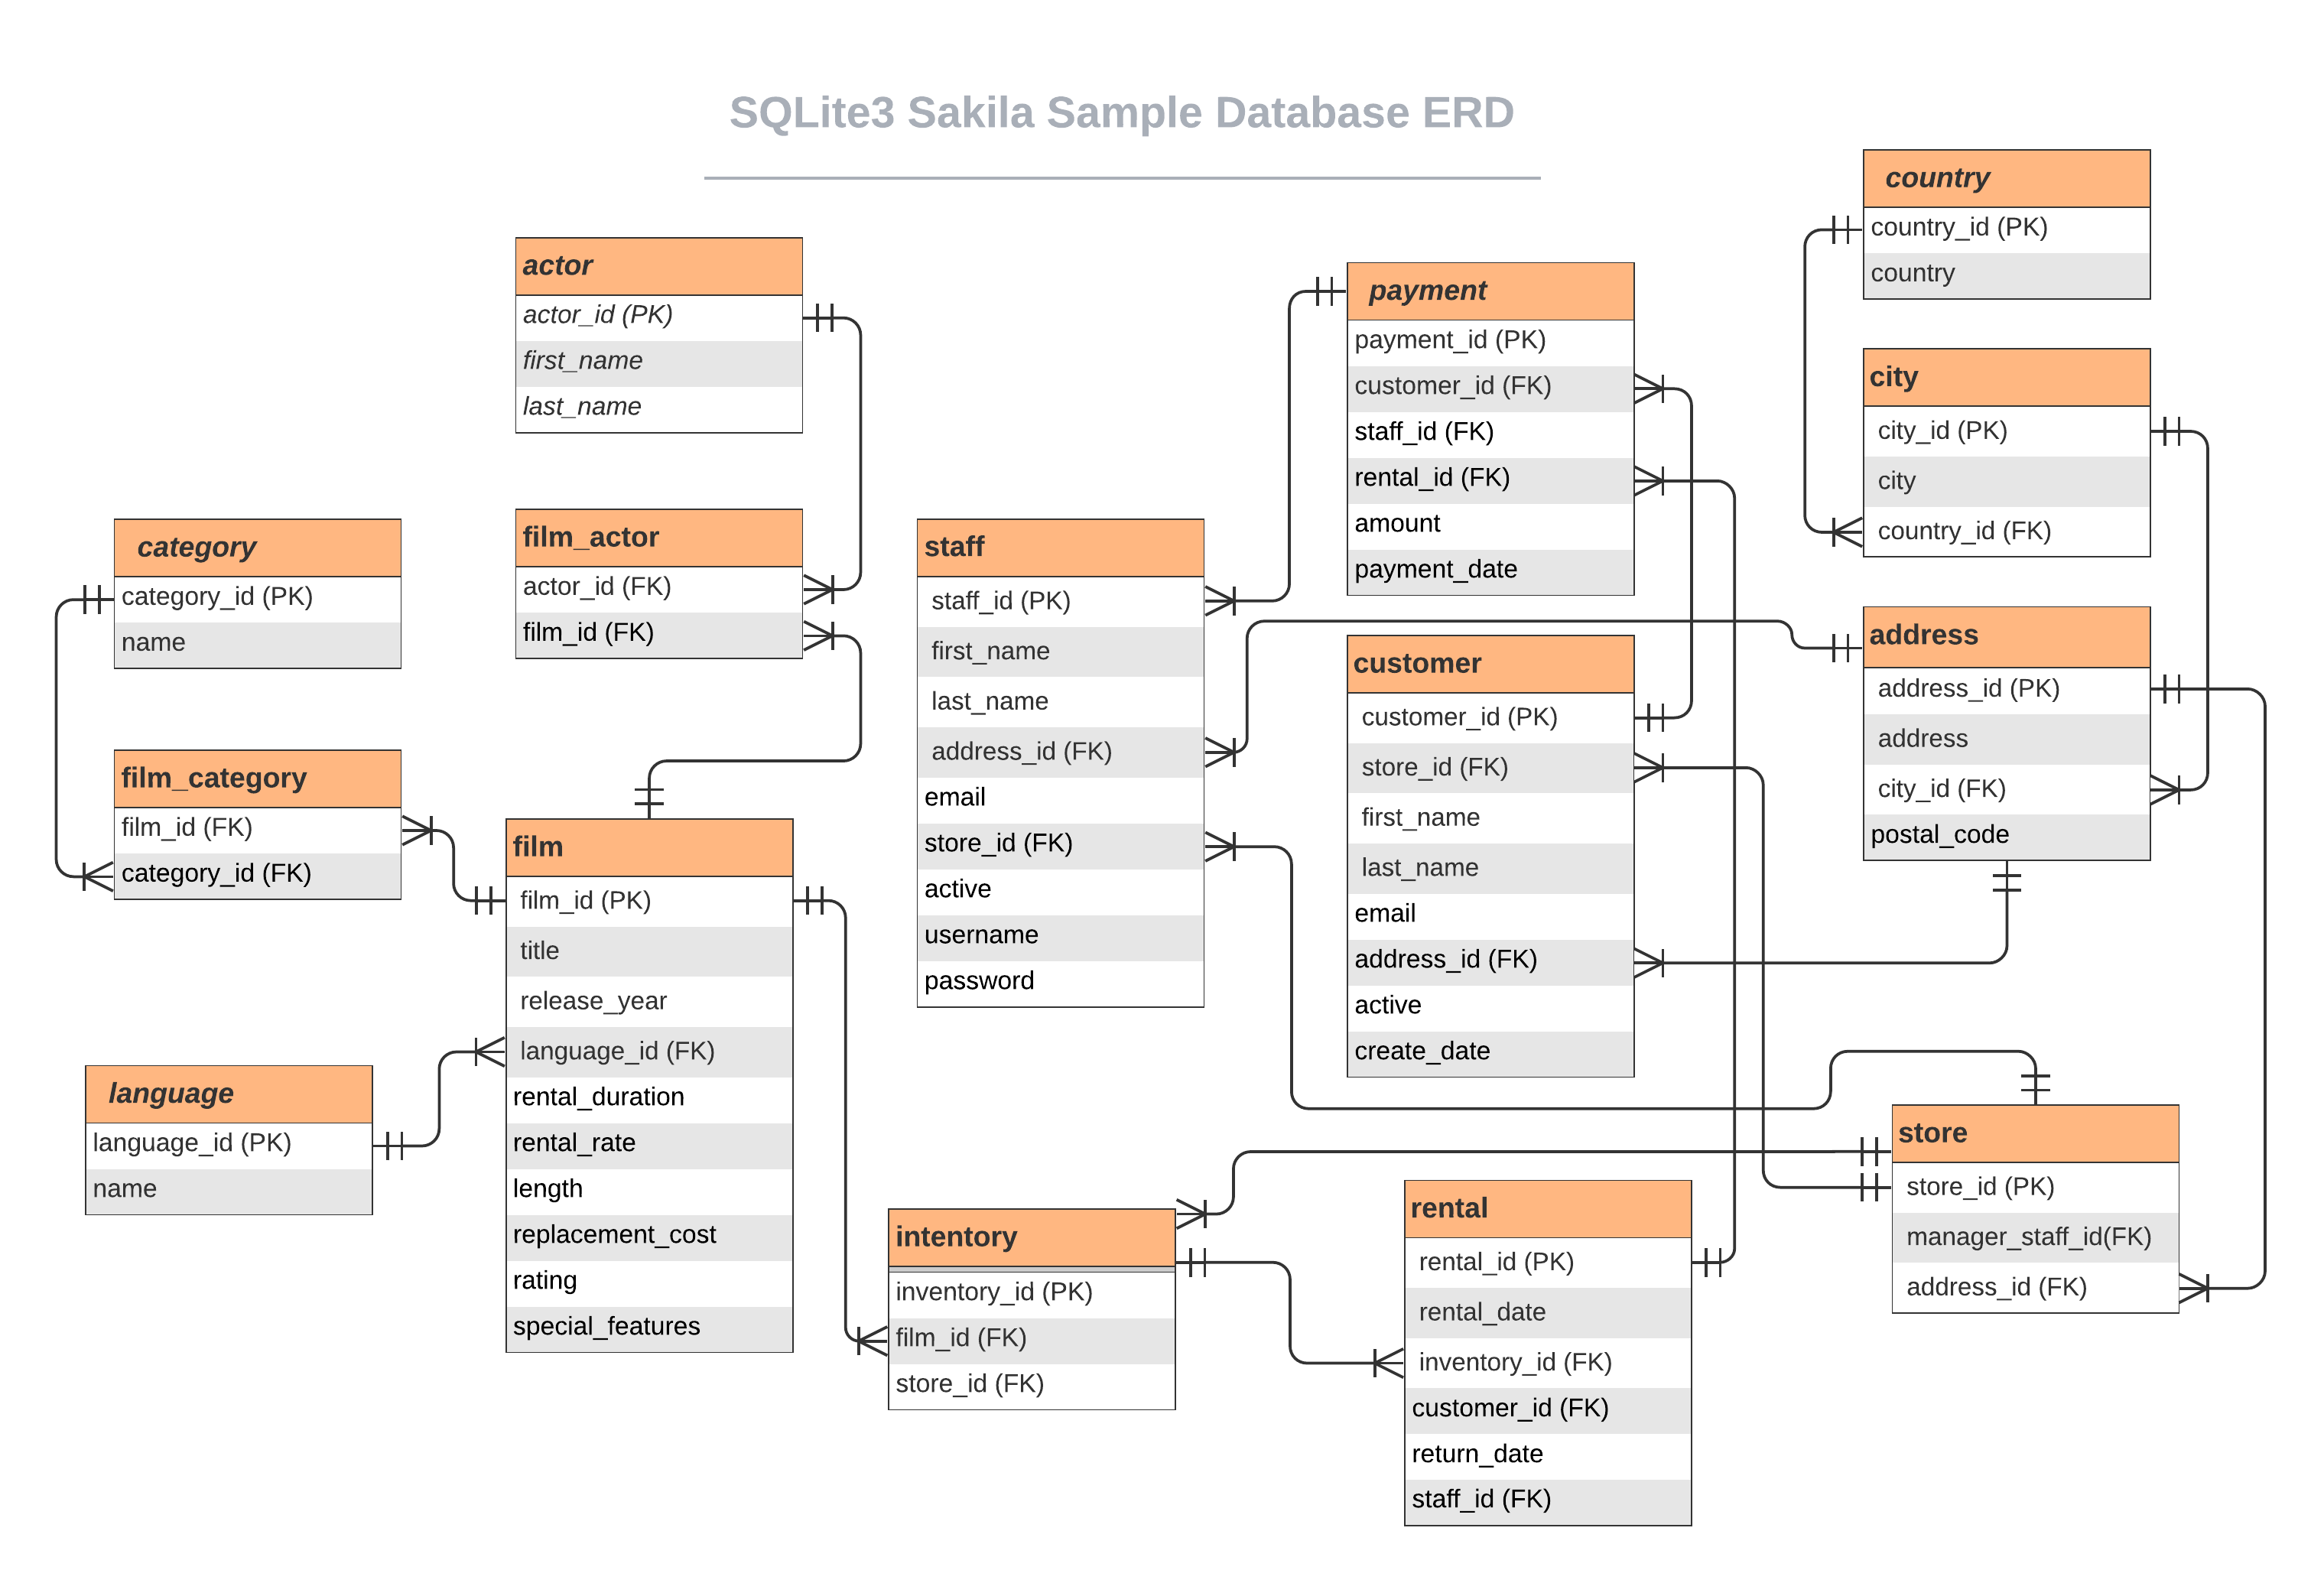

Source: https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database


    1. Library used: SQL, pandas, matplotlib, numpy, seaborn
    2. Visualizations used: pie chart, donut chart, bar graph, line chart
    3. question instructions:

                          - Number of total movies for  each rating category 
                          - Number of total movies category on inventory 
                          - Number of total rating category on inventory
                          - Number of total payments for each month 
                          - The most times rented by movies title
                          - The most times  rented by movies category
                          - Movies title by category on Table of Film
                          - Number of languages on inventory
                          - Visualization comparison between 2 store for payments


#Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

#Data Acquisition

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Make Directory .kaggle
!mkdir ~/.kaggle

In [4]:
#Copy kaggle.json into new directory
!cp kaggle.json ~/.kaggle/

In [5]:
#Permission for kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list -sqlite

ref                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jkkphys/english-wikipedia-articles-20170820-sqlite  English Wikipedia Articles 2017-08-20 SQLite          7GB  2018-11-27 21:54:22           1690         91  0.875            
harsha547/ipldatabase                               Indian Premier League SQLite Database                 4MB  2016-12-29 23:15:02           3152         57  0.7058824        
atanaskanev/sqlite-sakila-sample-database           SQLite Sakila Sample Database                         4MB  2021-03-14 16:09:42           1561         19  0.875            
rikdifos/nba-salary-and-statistics-201617           NBA Salary and Statistics 2016-17 (sqlite version)    2MB  2020-03-1

In [7]:
#Download dataset from kaggle
! kaggle datasets download -d "atanaskanev/sqlite-sakila-sample-database"

  0% 0.00/4.29M [00:00<?, ?B/s]
100% 4.29M/4.29M [00:00<00:00, 76.2MB/s]


In [8]:
#Unzip file
! unzip /content/sqlite-sakila-sample-database.zip -d sqlite-sakila

Archive:  /content/sqlite-sakila-sample-database.zip
  inflating: sqlite-sakila/README.txt  
  inflating: sqlite-sakila/SQLite3 Sakila Sample Database ERD.png  
  inflating: sqlite-sakila/sqlite-sakila-db/ReadME.txt  
  inflating: sqlite-sakila/sqlite-sakila-db/sqlite-sakila-delete-data.sql  
  inflating: sqlite-sakila/sqlite-sakila-db/sqlite-sakila-drop-objects.sql  
  inflating: sqlite-sakila/sqlite-sakila-db/sqlite-sakila-insert-data.sql  
  inflating: sqlite-sakila/sqlite-sakila-db/sqlite-sakila-schema.sql  
  inflating: sqlite-sakila/sqlite-sakila-db/sqlite-sakila.sq  
  inflating: sqlite-sakila/sqlite-sakila.db  


#Data Exploration

##Data Understanding

In [9]:
# connecting to the salika database
database= "/content/sqlite-sakila/sqlite-sakila.db"
connection = sqlite3.connect(database)
result = connection.cursor()

###Displaying all of table

In [10]:
# Displaying all the tables in the Sakila Database
df = pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type = 'table';

""", connection)

df.head(2)

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...


In [11]:
# Displaying unique from category
print('Unique: ', df['name'].nunique())
print( '\n', df['name'].unique())

Unique:  16

 ['actor' 'country' 'city' 'address' 'language' 'category' 'customer'
 'film' 'film_actor' 'film_category' 'film_text' 'inventory' 'staff'
 'store' 'payment' 'rental']


###Displaying from table of category

In [12]:
# Displaying film in the Sakila Database
command = """
          SELECT *
          FROM category
"""
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_category= pd.DataFrame.from_records(results, columns = cols)
results_category.head(2)

,category_id,name,last_update
0,1,Action,2021-03-06 15:52:00
1,2,Animation,2021-03-06 15:52:00


In [13]:
results_category.shape

(16, 3)

In [14]:
# Displaying unique from category
print('Unique: ', results_category['name'].nunique())
print( '\n', results_category['name'].unique())

Unique:  16

 ['Action' 'Animation' 'Children' 'Classics' 'Comedy' 'Documentary' 'Drama'
 'Family' 'Foreign' 'Games' 'Horror' 'Music' 'New' 'Sci-Fi' 'Sports'
 'Travel']


####Displaying from table of country

In [15]:
# Displaying country in the Sakila Database
command ="""

SELECT *
FROM country
"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_country= pd.DataFrame.from_records(results, columns = cols)
results_country.head(2)

,country_id,country,last_update
0,1,Afghanistan,2021-03-06 15:51:49
1,2,Algeria,2021-03-06 15:51:49


In [16]:
# Displaying from country
print('Unique: ', results_country['country'].nunique())
print( '\n', results_country['country'].unique())

Unique:  109

 ['Afghanistan' 'Algeria' 'American Samoa' 'Angola' 'Anguilla' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Belarus' 'Bolivia' 'Brazil' 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon'
 'Canada' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo, The Democratic Republic of the' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia'
 'Faroe Islands' 'Finland' 'France' 'French Guiana' 'French Polynesia'
 'Gambia' 'Germany' 'Greece' 'Greenland' 'Holy See (Vatican City State)'
 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Italy'
 'Japan' 'Kazakstan' 'Kenya' 'Kuwait' 'Latvia' 'Liechtenstein' 'Lithuania'
 'Madagascar' 'Malawi' 'Malaysia' 'Mexico' 'Moldova' 'Morocco'
 'Mozambique' 'Myanmar' 'Nauru' 'Nepal' 'Netherlands' 'New Zealand'
 'Nigeria' 'North Korea' 'Oman' 'Pakistan' 'Paraguay' 'Peru' 'Philippines'
 'Poland' 'Puerto Rico' 'Romania' 'Runion' 'Russian Federation'
 'Saint Vincent and the Grenadines' 'Saudi A

### Displaying from table of film

In [17]:
# Displaying film in the Sakila Database
command = """

SELECT *
FROM film

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_film= pd.DataFrame.from_records(results, columns = cols)
results_film.head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [18]:
results_film.shape

(1000, 13)

### Displaying language

In [19]:
# Displaying language in the Sakila Database
command = """

SELECT *
FROM language

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_payments= pd.DataFrame.from_records(results, columns = cols)
results_payments

,language_id,name,last_update
0,1,English,2021-03-06 15:51:48
1,2,Italian,2021-03-06 15:51:48
2,3,Japanese,2021-03-06 15:51:48
3,4,Mandarin,2021-03-06 15:51:48
4,5,French,2021-03-06 15:51:48
5,6,German,2021-03-06 15:51:48


### Displaying payment

In [20]:
# Displaying payment in the Sakila Database
command = """

SELECT *
FROM payment

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_payment= pd.DataFrame.from_records(results, columns = cols)
results_payment.head(2)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57


In [21]:
results_payment.shape

(16049, 7)

### Displaying rental

In [22]:
# Displaying rental in the Sakila Database
command = """

SELECT *
FROM rental

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_rental= pd.DataFrame.from_records(results, columns = cols)
results_rental.head(2)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41


In [23]:
results_rental.shape

(16044, 7)

### Displaying inventory 

In [24]:
# Displaying inventory in the Sakila Database
command = """

SELECT *
FROM inventory

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_inventory= pd.DataFrame.from_records(results, columns = cols)
results_inventory.head(2)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08


In [25]:
results_inventory.shape

(4581, 4)

### Displaying store

In [26]:
# Displaying store in the Sakila Database
command = """

SELECT *
FROM store

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_store= pd.DataFrame.from_records(results, columns = cols)
results_store.head(2)

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


### Displaying customer

In [27]:
# Displaying customer in the Sakila Database
command = """

SELECT *
FROM customer

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_customer= pd.DataFrame.from_records(results, columns = cols)
results_customer.head(2)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36


##Data Prepocessing

###Handling Missing Value

In [29]:
print(results_payment.isnull().sum().sort_values(ascending=False))

rental_id       5
payment_id      0
customer_id     0
staff_id        0
amount          0
payment_date    0
last_update     0
dtype: int64


In [30]:
pd.read_sql("""

SELECT *
FROM payment
WHERE rental_id IS NULL;

""", connection)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,424,16,1,None,1.99,2005-06-18 04:56:12.000,2021-03-06 15:56:00
1,7011,259,2,None,1.99,2005-08-23 06:13:16.000,2021-03-06 15:56:55
2,10840,401,1,None,0.99,2005-07-12 06:26:10.000,2021-03-06 15:57:27
3,14675,546,1,None,3.99,2005-07-30 21:16:20.000,2021-03-06 15:57:58
4,15458,577,2,None,0.99,2005-05-27 00:46:39.000,2021-03-06 15:58:04


In the rental table when a rented film has not been returned yet, this is represented with a NULL value in the return_date column, logically.

In [31]:
print(results_film.isnull().sum().sort_values(ascending=False))

original_language_id    1000
film_id                    0
title                      0
description                0
release_year               0
language_id                0
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
dtype: int64


In [32]:
print(results_inventory.isnull().sum().sort_values(ascending=False))

inventory_id    0
film_id         0
store_id        0
last_update     0
dtype: int64


#Data Processing

###AGGREGATION - (SUM, COUNT, MIN, MAX, AVG)

In [33]:
# Excecute from table of payment
command = """

SELECT
     MIN(payment_date) AS "MIN (Payment Date)",
     MAX(payment_date) AS "MAX (Payment Date)"
     FROM payment

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_payments= pd.DataFrame.from_records(results, columns = cols)
results_payments

,MIN (Payment Date),MAX (Payment Date)
0,2005-05-24 22:53:30.000,2006-02-14 15:16:03.000


In [34]:
command = """
          SELECT SUM(payment.amount) AS 'Total Payment Before 2006', 
          AVG(payment.amount) AS 'Average Payment Before 2006',
          MIN(payment.amount) AS 'Minimum Payment Before 2006',
          MAX(payment.amount) AS 'Maximum Payment Before 2006'
          FROM payment
          WHERE payment_date <= '2006-01-01';
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_payments= pd.DataFrame.from_records(results, columns = cols)
results_payments

,Total Payment Before 2006,Average Payment Before 2006,Minimum Payment Before 2006,Maximum Payment Before 2006
0,66902.33,4.216445,0.99,11.99


In [35]:
command = """
          SELECT SUM(payment.amount) AS 'Total Payment After 2006', 
          AVG(payment.amount) AS 'Average Payment After 2006',
          MIN(payment.amount) AS 'Minimum Payment After 2006',
          MAX(payment.amount) AS 'Maximum Payment After 2006'
          FROM payment
          WHERE payment_date >= '2006-01-01';
          
          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_payments2= pd.DataFrame.from_records(results, columns = cols)
results_payments2

,Total Payment After 2006,Average Payment After 2006,Minimum Payment After 2006,Maximum Payment After 2006
0,514.18,2.825165,0,9.98


###How many movies are there for each rating category from Table of Film?

In [36]:
command = """

SELECT 
    rating AS "Movies Rating", COUNT(film_id) AS "Total Movies"
    FROM film
    GROUP BY rating
    ORDER BY COUNT(film_id) DESC

"""
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_rating= pd.DataFrame.from_records(results, columns = cols)
results_rating

,Movies Rating,Total Movies
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


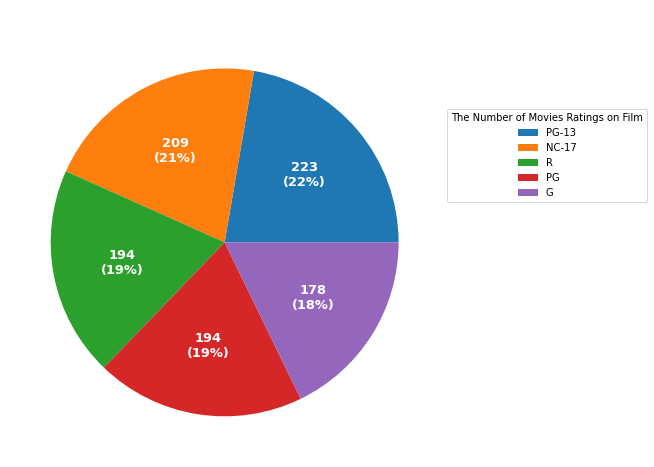

In [37]:
fig, ax = plt.subplots(figsize = (8,8))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:,.0f}\n({:.0f}%)".format(absolute, pct)


wedges, texts, autotexts = ax.pie(results_rating["Total Movies"],
       labels = results_rating["Movies Rating"],
       autopct=lambda pct: func(pct, results_rating["Total Movies"]),
       textprops=dict(color="w", fontsize = 13, fontweight = "bold"))
ax.legend(wedges, results_rating["Movies Rating"],
          title="The Number of Movies Ratings on Film",
          fontsize = 10,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1))
ax.set_title("Movies Rating", fontsize = 15, color='#ffffff')
plt.rcParams['legend.title_fontsize'] = 12

plt.show()

###How many  total movies category are there on inventory, from table of film & inventory?

In [38]:
command = """

    SELECT c.name AS 'Category Movies', COUNT(i.film_id) AS 'Total Inventory'
    FROM film as f
    INNER JOIN inventory AS i ON i.film_id = f.film_id
    LEFT JOIN film_category as fc on fc.film_id = f.film_id
    LEFT JOIN category as c on c.category_id = fc.category_id
    GROUP BY c.name
    ORDER BY COUNT(i.film_id) desc

    """   

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_invent= pd.DataFrame.from_records(results, columns = cols)
results_invent

,Category Movies,Total Inventory
0,Sports,344
1,Animation,335
2,Action,312
3,Sci-Fi,312
4,Family,310
5,Drama,300
6,Foreign,300
7,Documentary,294
8,Games,276
9,New,275


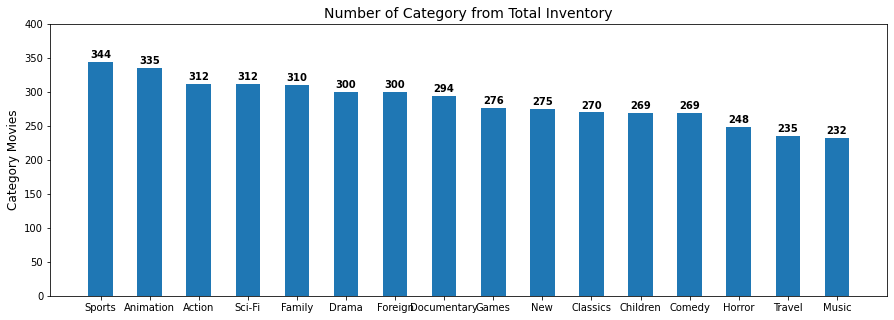

In [39]:
fig, ax = plt.subplots(figsize = (15,5))

ypos = np.arange(len(results_invent["Total Inventory"]))
bars = ax.bar(ypos, results_invent["Total Inventory"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(results_invent["Category Movies"])
ax.set_ylim(ymax = 400)
ax.set_title("Number of Category from Total Inventory", fontsize = 14)
ax.set_ylabel("Category Movies", fontsize = 12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")

plt.show()

###What the Most Movies Rating Category on Inventory?

In [40]:
command = """

SELECT 
    film.rating AS "Movies Rating", COUNT(DISTINCT inventory.film_id) AS "Total Inventory"
    FROM film JOIN inventory
    ON film.film_id = inventory.film_id
    GROUP BY film.rating
    ORDER BY COUNT(inventory.film_id) DESC

"""
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_rate_invent= pd.DataFrame.from_records(results, columns = cols)
results_rate_invent

,Movies Rating,Total Inventory
0,PG-13,213
1,NC-17,202
2,PG,183
3,R,189
4,G,171


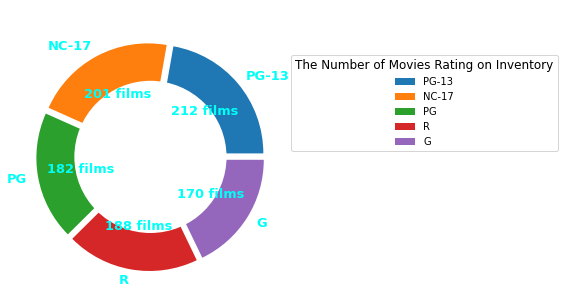

In [41]:
fig, ax = plt.subplots(figsize = (5,5))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:,.0f} films".format(absolute, pct)

 
wedges, texts, autotexts = ax.pie(results_rate_invent["Total Inventory"],
       labels = results_rate_invent["Movies Rating"],
       autopct=lambda pct: func(pct, results_rate_invent["Total Inventory"]),
       explode = (0.05, 0.05, 0.05, 0.05, 0.05),
       textprops=dict(color="#00fff6", fontsize = 13, fontweight = "bold"))
ax.legend(wedges, results_rate_invent["Movies Rating"],
          title="The Number of Movies Rating on Inventory",
          fontsize = 10,
          loc="center left",
          bbox_to_anchor=(1, 0.2, 0.5, 1))
ax.set_title("Movies Rating", fontsize = 10, color='#ffffff')
plt.rcParams['legend.title_fontsize'] = 10

# Adding Circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.70, fc='#ffffff')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

###Which the Most Times Rented are There by Movies Title?

In [42]:
command = """
          SELECT f.title AS 'Movies Title', count(r.rental_date) AS 'Times Rented'
          FROM film AS f
          INNER JOIN inventory AS i ON i.film_id = f.film_id
          INNER JOIN rental AS r ON r.inventory_id = i.inventory_id
          GROUP BY f.title
          ORDER BY count(r.rental_date) desc
          Limit 10;

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_top_rent= pd.DataFrame.from_records(results, columns = cols)
results_top_rent

,Movies Title,Times Rented
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,FORWARD TEMPLE,32
3,GRIT CLOCKWORK,32
4,JUGGLER HARDLY,32
5,RIDGEMONT SUBMARINE,32
6,SCALAWAG DUCK,32
7,APACHE DIVINE,31
8,GOODFELLAS SALUTE,31
9,HOBBIT ALIEN,31


###What The most times rented by movies category?

In [43]:
command = """
          SELECT c.name AS 'Category Movies', count(r.rental_id) AS 'Times Rented'
          FROM film AS f
          INNER JOIN inventory AS i ON i.film_id = f.film_id
          INNER JOIN rental AS r ON r.inventory_id = i.inventory_id
          LEFT JOIN film_category as fc on fc.film_id = f.film_id
          LEFT JOIN category as c on c.category_id = fc.category_id
          GROUP BY  c.name
          ORDER BY count(r.rental_id) desc       

         """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_rent_categ= pd.DataFrame.from_records(results, columns = cols)
results_rent_categ

,Category Movies,Times Rented
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


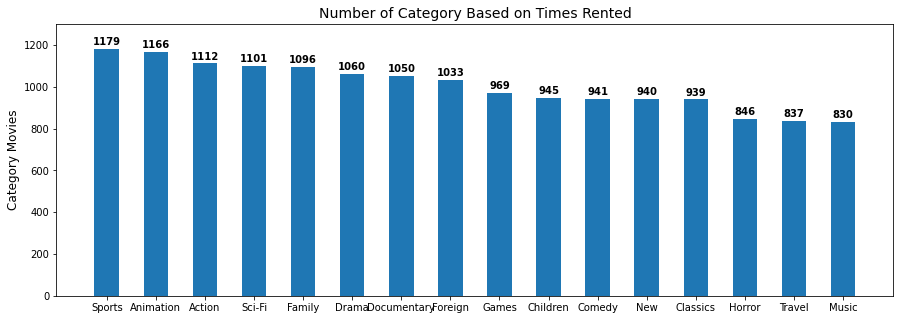

In [44]:
fig, ax = plt.subplots(figsize = (15,5))

ypos = np.arange(len(results_rent_categ["Times Rented"]))
bars = ax.bar(ypos, results_rent_categ["Times Rented"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(results_rent_categ["Category Movies"])
ax.set_ylim(ymax = 1300)
ax.set_title("Number of Category Based on Times Rented", fontsize = 14)
ax.set_ylabel("Category Movies", fontsize = 12)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")

plt.show()

###How many total payment for each month from table of payment?

In [45]:
command = """
SELECT  
     strftime('%Y-%m', payment_date) AS "Date",
     ROUND(SUM(amount), 0) AS "Total_Payments"
     FROM payment
     GROUP BY Date
     ORDER BY Date ASC

"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data_sales= pd.DataFrame.from_records(results, columns = cols)
results_data_sales

,Date,Total_Payments
0,2005-05,4824.0
1,2005-06,9632.0
2,2005-07,28374.0
3,2005-08,24072.0
4,2006-02,514.0


There is data only for May, June, July and August 2005. For February 2006, perhaps the stores were being renovated or the business operations were closed for several months and reopened in February 2006

In [46]:
# Drop the last row
results_data_sales = results_data_sales.iloc[0:4].set_index("Date") 

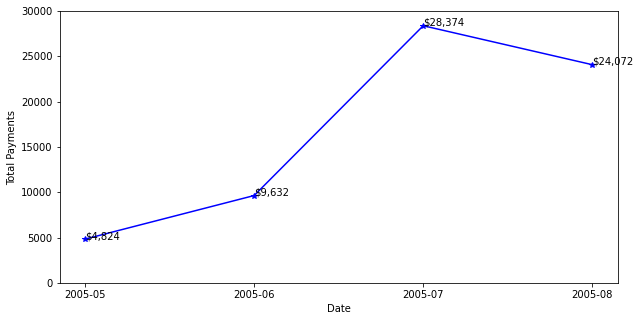

In [49]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(results_data_sales,"b*-")
ax.set_ylim(ymin = 0, ymax = 30000)
ax.set_ylabel("Total Payments")
ax.set_xlabel("Date")

for Date, Total_Payments in results_data_sales["Total_Payments"].items():
    ax.annotate(str("${:,.0f}".format(Total_Payments)),
                xy=(Date, Total_Payments))

plt.show()

###Movies category on Table of Film

In [50]:
#Sports
command = """
           SELECT f.title AS 'Movie Title', c.name AS 'Category Movie'
           FROM film as f
           LEFT JOIN film_category as fc on fc.film_id = f.film_id
           LEFT JOIN category as c on c.category_id = fc.category_id
           WHERE c.name = 'Sports';

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_data= pd.DataFrame.from_records(results, columns = cols)
results_data

,Movie Title,Category Movie
0,ALADDIN CALENDAR,Sports
1,ANONYMOUS HUMAN,Sports
2,ARTIST COLDBLOODED,Sports
3,BUBBLE GROSSE,Sports
4,CALIFORNIA BIRDS,Sports
...,...,...
69,TIGHTS DAWN,Sports
70,TOURIST PELICAN,Sports
71,TRADING PINOCCHIO,Sports
72,TUXEDO MILE,Sports


In [52]:
#Animation
command = """
           SELECT f.title AS 'Movie Title', c.name AS 'Category Movie'
           FROM film as f
           LEFT JOIN film_category as fc on fc.film_id = f.film_id
           LEFT JOIN category as c on c.category_id = fc.category_id
           WHERE c.name = 'Animation';

          """
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_horror= pd.DataFrame.from_records(results, columns = cols)
results_horror

,Movie Title,Category Movie
0,ALTER VICTORY,Animation
1,ANACONDA CONFESSIONS,Animation
2,ARGONAUTS TOWN,Animation
3,BIKINI BORROWERS,Animation
4,BLACKOUT PRIVATE,Animation
...,...,...
61,TRACY CIDER,Animation
62,TURN STAR,Animation
63,WAIT CIDER,Animation
64,WATCH TRACY,Animation


###What the Most Languages on Inventory?

In [56]:
command = """

SELECT 
    l.name AS "Languages", COUNT(i.film_id) AS "Total Inventory"
    FROM film as f
    INNER JOIN inventory AS i ON i.film_id = f.film_id
    LEFT JOIN language as l on l.language_id = f.language_id
    GROUP BY l.name
    ORDER BY COUNT(i.film_id) DESC

"""
result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_language= pd.DataFrame.from_records(results, columns = cols)
results_language

,Languages,Total Inventory
0,English,4581


###How visualizations comparation for payment between 2 store?

In [57]:
command = """
	
  SELECT 
	c.store_id AS "Store", strftime('%Y-%m', sub_table.payment_date) AS Date, ROUND(SUM(sub_table.amount),0) AS "Payment"
	FROM customer c JOIN (SELECT   
							customer_id,
							payment_date,
							amount
						  FROM payment) AS "sub_table"
	ON c.customer_id = sub_table.customer_id
    WHERE Date < '2006-01'
	GROUP BY c.store_id, Date
	ORDER BY c.store_id, Date
	
"""

result.execute(command)
results = result.fetchall()
cols = [column[0] for column in result.description]
results_store= pd.DataFrame.from_records(results, columns = cols)
results_store

,Store,Date,Payment
0,1,2005-05,2695.0
1,1,2005-06,5149.0
2,1,2005-07,15739.0
3,1,2005-08,13136.0
4,2,2005-05,2130.0
5,2,2005-06,4483.0
6,2,2005-07,12635.0
7,2,2005-08,10936.0


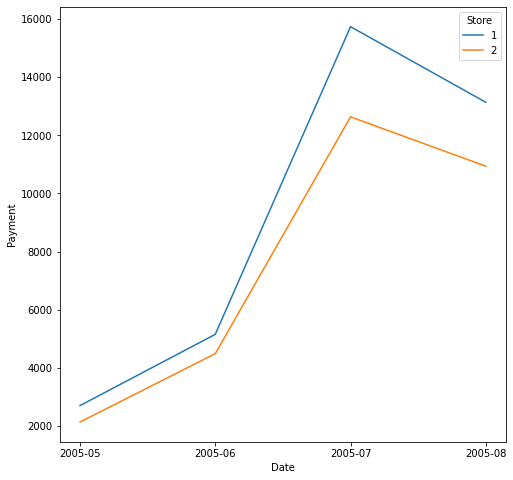

In [60]:
plt.subplots(figsize=(8, 8))
sns.lineplot(data=results_store, x="Date", y="Payment", hue="Store", palette="tab10", )
plt.show()